# random snippets

## load multiple csv files into pandas dataframe

In [53]:
BASE = "/home/jovyan/data/mk/timeseries/"

file = BASE + "1.csv"
#reader = csv.reader(open(file, "rb"), delimiter=",")

with open(file, "r") as f:
    headers = f.readline()
    
headers = headers.split(",")

In [54]:
import numpy as np
import pandas as pd

x = np.loadtxt(
    open(file, "rb"), 
    delimiter=",", 
    skiprows=1
)
dataFrame = pd.DataFrame(x)
    
    
for i in range(2,8):
    file = BASE + str(i) + ".csv"
    print("loading", i)
    x = np.loadtxt(
        open(file, "rb"), 
        delimiter=",", 
        skiprows=1
    )
    dataFrame = dataFrame.append(pd.DataFrame(x), ignore_index = True)
#x = list(reader)

dataFrame.columns = headers

loading 2
loading 3
loading 4
loading 5
loading 6
loading 7


In [55]:
dataFrame

,cpu_alerta.lab_mean_usage_guest,cpu_alerta.lab_mean_usage_guest_nice,cpu_alerta.lab_mean_usage_idle,cpu_alerta.lab_mean_usage_iowait,cpu_alerta.lab_mean_usage_irq,cpu_alerta.lab_mean_usage_nice,cpu_alerta.lab_mean_usage_softirq,cpu_alerta.lab_mean_usage_steal,cpu_alerta.lab_mean_usage_system,cpu_alerta.lab_mean_usage_user,...,elasticsearch_thread_pool_elastic.lab_XEI5kEd_mean_warmer_completed,elasticsearch_thread_pool_elastic.lab_XEI5kEd_mean_warmer_largest,elasticsearch_thread_pool_elastic.lab_XEI5kEd_mean_warmer_queue,elasticsearch_thread_pool_elastic.lab_XEI5kEd_mean_warmer_rejected,elasticsearch_thread_pool_elastic.lab_XEI5kEd_mean_warmer_threads,elasticsearch_transport_elastic.lab_XEI5kEd_mean_rx_count,elasticsearch_transport_elastic.lab_XEI5kEd_mean_rx_size_in_bytes,elasticsearch_transport_elastic.lab_XEI5kEd_mean_server_open,elasticsearch_transport_elastic.lab_XEI5kEd_mean_tx_count,elasticsearch_transport_elastic.lab_XEI5kEd_mean_tx_size_in_bytes
0,0.0,0.0,99.633276,0.008333,0.0,0.0,0.007499,0.0,0.080861,0.270030,...,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,99.641441,0.012508,0.0,0.0,0.000833,0.0,0.078363,0.266856,...,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,99.622385,0.008334,0.0,0.0,0.003333,0.0,0.090843,0.275104,...,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,99.620638,0.024191,0.0,0.0,0.004167,0.0,0.080049,0.270954,...,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,99.673093,0.009166,0.0,0.0,0.004170,0.0,0.080066,0.233505,...,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,99.614249,0.020828,0.0,0.0,0.008335,0.0,0.103352,0.253236,...,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,99.636592,0.020004,0.0,0.0,0.000000,0.0,0.083389,0.260015,...,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,99.655004,0.009161,0.0,0.0,0.000000,0.0,0.087541,0.248295,...,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,99.651484,0.012504,0.0,0.0,0.005000,0.0,0.071730,0.259282,...,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,99.671592,0.011664,0.0,0.0,0.007501,0.0,0.091687,0.217556,...,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## plot data

In [56]:
import matplotlib.pyplot as plt

In [57]:
#row = dataFrame.loc[0]
col = dataFrame["cpu_tick.lab_mean_usage_softirq"]
col

0        0.004998
1        0.008338
2        0.003343
3        0.011678
4        0.000834
5        0.000834
6        0.015831
7        0.011668
8        0.004990
9        0.004168
10       0.011679
11       0.010004
12       0.011670
13       0.008338
14       0.004164
15       0.050187
16       0.029156
17       0.050002
18       0.046780
19       0.024164
20       0.008335
21       0.004999
22       0.015831
23       0.012505
24       0.004174
25       0.017505
26       0.004171
27       0.003333
28       0.011664
29       0.001668
           ...   
10050    0.012513
10051    0.013353
10052    0.004164
10053    0.008334
10054    0.007497
10055    0.000834
10056    0.012502
10057    0.000835
10058    0.010844
10059    0.011683
10060    0.001668
10061    0.011661
10062    0.008340
10063    0.008335
10064    0.008335
10065    0.012506
10066    0.012506
10067    0.004997
10068    0.004178
10069    0.004171
10070    0.004168
10071    0.007508
10072    0.016673
10073    0.005005
10074    0

<function matplotlib.pyplot.show>

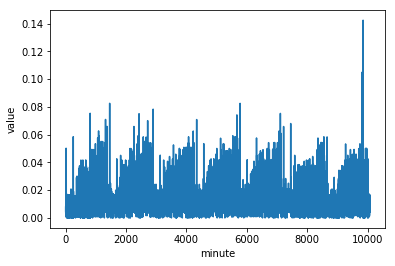

In [58]:
plt.plot(col)
plt.ylabel('value')
plt.xlabel('minute')
plt.show